<a href="https://colab.research.google.com/github/damilola2010/Grip_Foundation_task2/blob/main/Task2_Sparks_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction using Supervised ML

Predict the score a student will get based on the numbers of hours of study

So, bandicam, my screen recorder only aloows you to record 10 mis, else, you have to pay. so i recordedthe first ten minutes and then for the rest, i wrote my code, cleared the output then i will re-run them. This will allow me record shorter video. You are welcome!

In [26]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb


In [27]:
#Loading the dataset
score_df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [28]:
#View he dataset
score_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Cleaning

In [29]:
#Have a look at the shape
score_df.shape

(25, 2)

In [30]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [31]:
#Statistical description of our data
score_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
#Check for missing values
score_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [33]:
#Check for duplicates
score_df.duplicated().sum()

0

### Data Visualization and Linearity Check


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


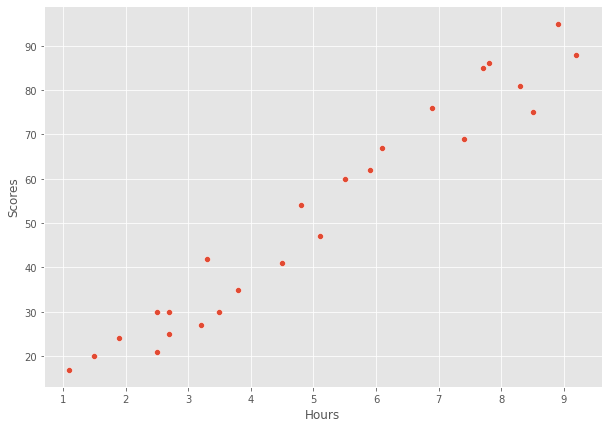

In [34]:
plt.figure(figsize=(10,7))
plt.style.use("ggplot")
sb.scatterplot(score_df['Hours'],score_df['Scores'])
plt.show()

In the above, we can see that we have  a linear relationship between the hours studied and score. The score is dependent on the hours studied, hence the score is the target variable

### Test and Train Dataset

In [35]:
#import the package
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [36]:
Predictor=['Hours']
TargetVariable=['Scores']
x = score_df[Predictor].values
y = score_df[TargetVariable].values

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#Using test dataset size as 30% and train as 70%

(17, 1) (8, 1) (17, 1) (8, 1)


In [38]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(17, 1) (8, 1) (17, 1) (8, 1)


In [39]:
#Create a classifier
classifier = LinearRegression()

In [40]:
classifier.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualize training set

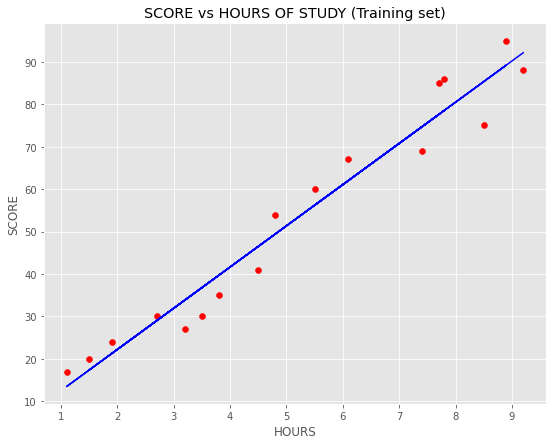

In [41]:
plt.figure(figsize=(9,7))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, classifier.predict(x_train), color = 'blue')
plt.title('SCORE vs HOURS OF STUDY (Training set)')
plt.xlabel('HOURS')
plt.ylabel('SCORE')
plt.show()

### Visualize the test set

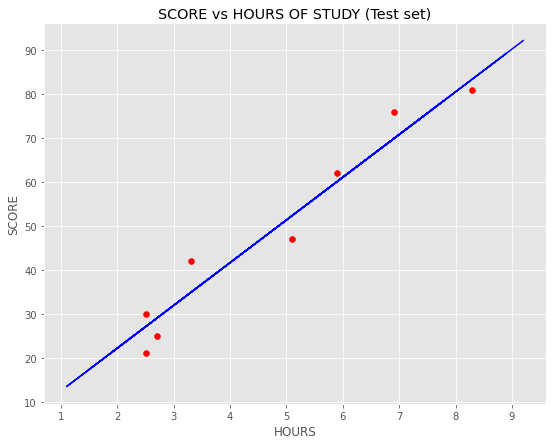

In [42]:

plt.figure(figsize=(9,7))
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, classifier.predict(x_train), color = 'blue')
plt.title('SCORE vs HOURS OF STUDY (Test set)')
plt.xlabel('HOURS')
plt.ylabel('SCORE')
plt.show()

In [43]:
classifier.predict(x_test)

array([[83.39168645],
       [27.07054902],
       [27.07054902],
       [69.79692914],
       [60.0863882 ],
       [29.0126572 ],
       [34.83898177],
       [52.31795545]])

In [44]:
#Check for accuracy
classifier.score(x_test,y_test)

0.9487647340257012

The accuracy is 94.8%

Accuracy of my prediction is 94.8%

In [45]:
#Check for slope
classifier.coef_

array([[9.71054094]])

In [46]:
#Check for intercept
classifier.intercept_

array([2.79419668])

### Score of a student that studied for 9.25 hours

In [47]:
score = classifier.predict([[9.25]])

print(score)

[[92.61670034]]


A student that studied for 9.25 hours per day will score 92.6